# Blending and Pasting Images

## Blending Image

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
img1 = cv2.imread('../DATA/dog_backpack.png')
img2 = cv2.imread('../DATA/watermark_no_copy.png')

In [4]:
img1.shape

(1401, 934, 3)

In [5]:
img2.shape

(1280, 1277, 3)

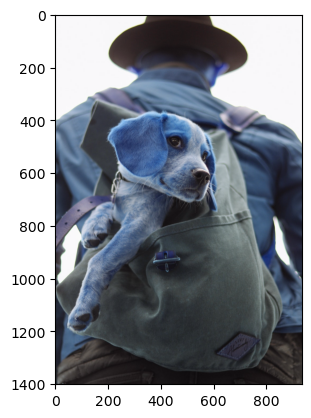

In [6]:
plt.imshow(img1)

In [7]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

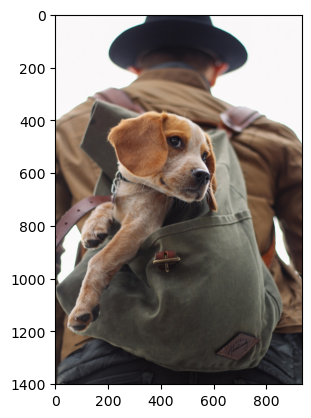

In [8]:
plt.imshow(img1)

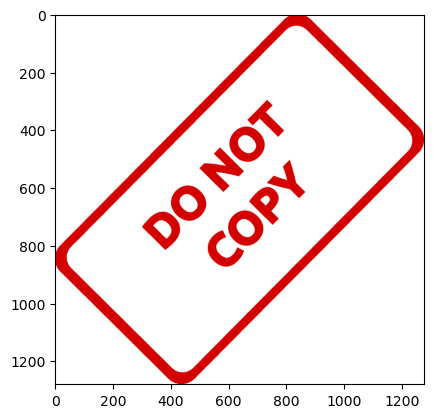

In [9]:
plt.imshow(img2)

# Resizing the Image

In [10]:
img1 = cv2.resize(img1, (1200,1200))
img2 = cv2.resize(img2, (1200,1200))

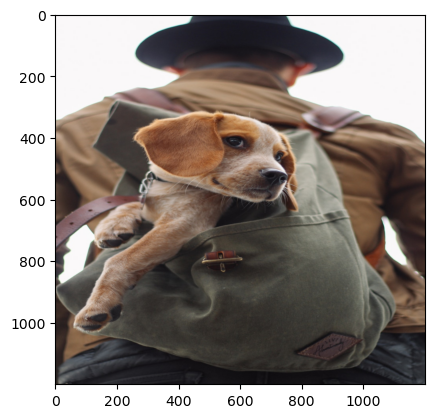

In [11]:
plt.imshow(img1)

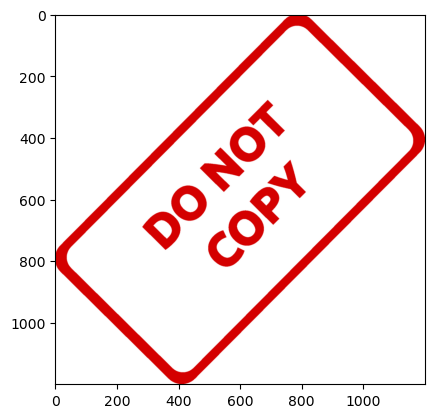

In [12]:
plt.imshow(img2)

# Blending the Image
* formula: $img1*\alpha + img2 * \beta + \gamma$ 

In [13]:
img1.shape

(1200, 1200, 3)

In [14]:
img2.shape

(1200, 1200, 3)

In [22]:
blended = cv2.addWeighted(src1=img1, alpha=0.7, src2=img2, beta=0.3, gamma=0)

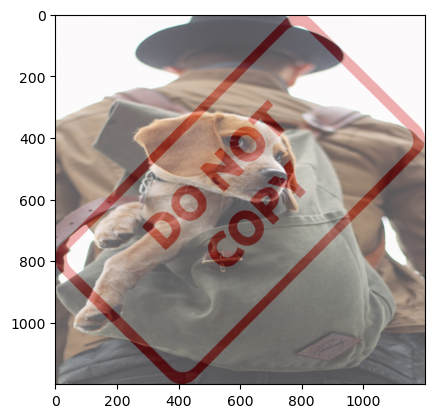

In [23]:
plt.imshow(blended)

# Overlaying Images of Diffrent Sizes

In [24]:
img1 = cv2.imread('../DATA/dog_backpack.png')
img2 = cv2.imread('../DATA/watermark_no_copy.png')
img2 = cv2.resize(img2, (600,600))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

large_img = img1
small_img = img2

In [25]:
x_offset=0
y_offset=0

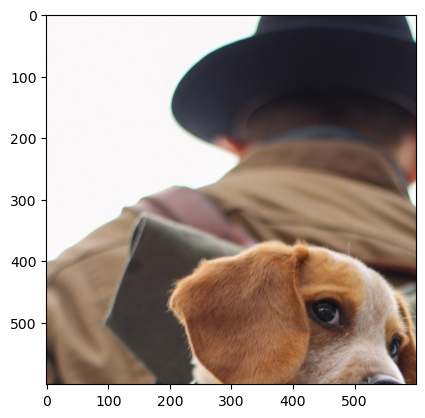

In [30]:
part_of_large_img = large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]]
plt.imshow(part_of_large_img)

In [32]:
large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

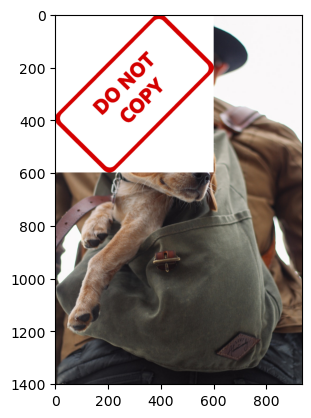

In [33]:
plt.imshow(large_img)

# Blending Images of Different Size

In [34]:
img1 = cv2.imread('../DATA/dog_backpack.png')
img2 = cv2.imread('../DATA/watermark_no_copy.png')
img2 = cv2.resize(img2, (600,600))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


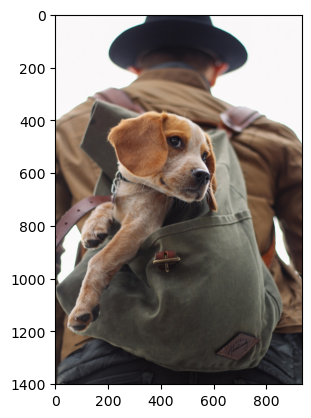

In [35]:
plt.imshow(img1)

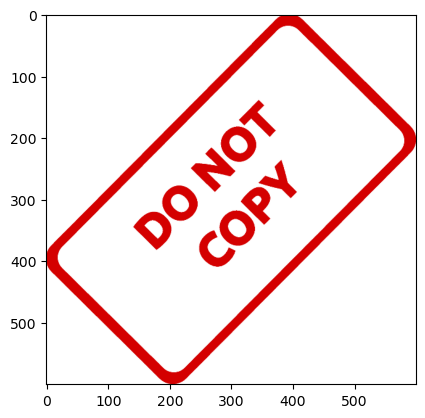

In [36]:
plt.imshow(img2)

# Creating a Region of Interest (ROI)

In [37]:
img1.shape

(1401, 934, 3)

In [38]:
x_offset = 934-600
y_offset = 1401-600

In [39]:
rows, cols, channels = img2.shape

roi = img1[y_offset:img1.shape[0],x_offset:img1.shape[1]] #1401, 934

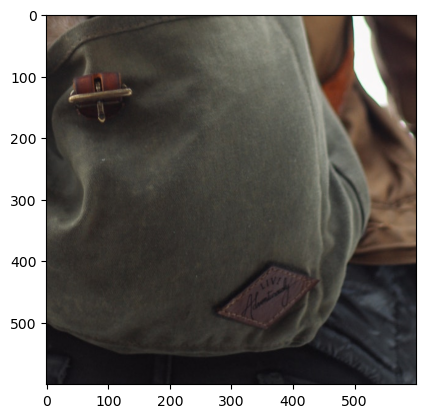

In [40]:
plt.imshow(roi)

# Creating a Mask

In [41]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [42]:
img2gray.shape

(600, 600)

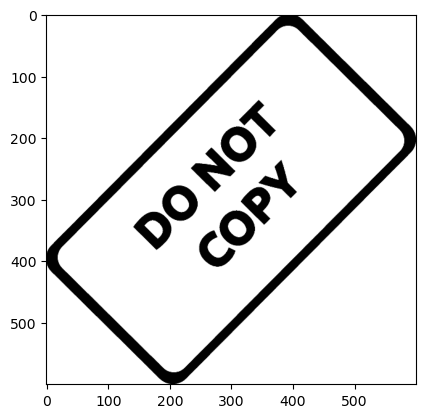

In [43]:
plt.imshow(img2gray, cmap='gray')

In [45]:
mask_inv = cv2.bitwise_not(img2gray)

In [46]:
mask_inv.shape

(600, 600)

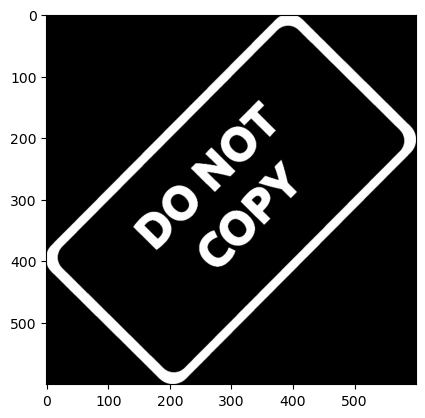

In [47]:
plt.imshow(mask_inv,cmap='gray')

# Convert Mask to have 3 channels
$\texttt{dst} (I) =  \texttt{src1} (I)  \vee \texttt{src2} (I) \quad \texttt{if mask} (I) \ne0$

In [48]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)

In [50]:
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)

In [52]:
bk.shape

(600, 600, 3)

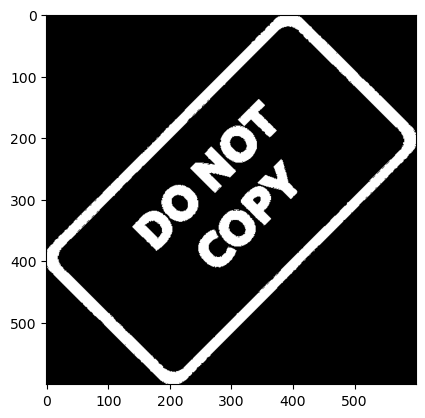

In [53]:
plt.imshow(bk)

In [1]:
img3 =cv2.bitwise_or(img2,img2, mask=mask_inv)

NameError: name 'cv2' is not defined

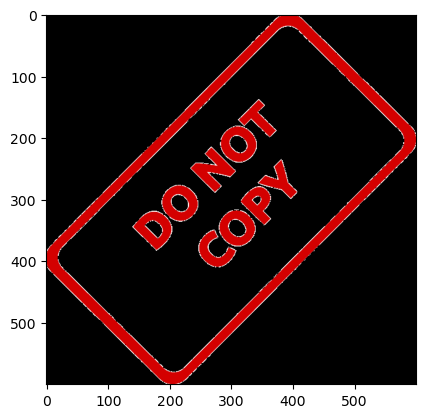

In [55]:
plt.imshow(img3)

In [56]:
img3.shape

(600, 600, 3)

# Get ROI and blend in the mask with the ROI

In [57]:
final_roi = cv2.bitwise_or(roi,img3)

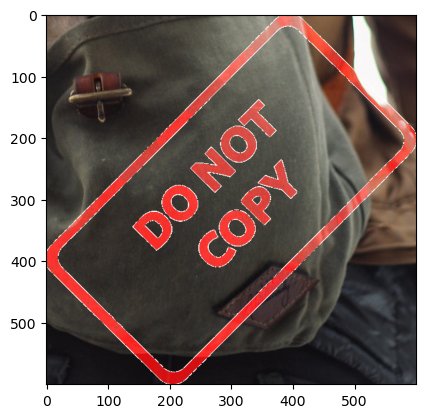

In [58]:
plt.imshow(final_roi)

# Now add in the rest of the image

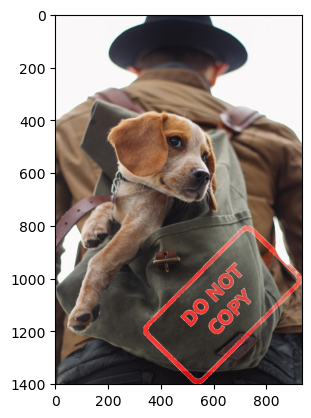

In [59]:
l_img = img1
s_img = final_roi

l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]] = s_img
plt.imshow(l_img)

* https://stackoverflow.com/questions/10469235/opencv-apply-mask-to-a-color-image/38493075
* https://stackoverflow.com/questions/14063070/overlay-a-smaller-image-on-a-larger-image-python-opencv
* https://docs.opencv.org/3.4/d0/d86/tutorial_py_image_arithmetics.html
